In [184]:
import sklearn as sk 
import numpy as np
import pandas as pd
import tensorflow as tf
import itertools
import matplotlib.pyplot as plt

%matplotlib inline


In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [8]:
iris = load_iris()

In [9]:
X = iris.data[:,2:] #petal length and width
y = iris.target

In [10]:
tree_clf = DecisionTreeClassifier(
    max_depth=3
    #min_samples_split=10
    )
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.33333333, 0.66666667]])

In [15]:
tree_clf.predict([[5,1.5]])

array([2])

In [190]:
def draw_tree_decision_boundary(clf, X, y, feature_names=None, class_names=None):

    import numpy as np
    import matplotlib.pyplot as plt
    import itertools
    
    
    # Parameters
    n_classes = len(np.unique(y))
    plot_colors = "rby"
    plot_step = 0.02
    class_pairs = list(itertools.combinations(np.unique(y),2))
    plot_rows = int(np.ceil(len(class_pairs)/3))
    
    n_features_pairs = list(itertools.combinations(range(X.shape[1]),2))
    plot_cols = int(min(len(n_features_pairs),3))
    
    
    if feature_names is None:
        feature_names = ['x{}'.format(n) for n in range(1,clf.n_features_+1)]

    if class_names is None:
        class_names = ['y{}'.format(n) for n in range(1,clf.n_classes_+1)]

    
    for pairidx, pair in enumerate(n_features_pairs):
        # We only take the two corresponding features
        P = X[:, list(pair)]
        
        
        # Plot the decision boundary
        row = int(np.floor(pairidx/plot_cols))
        col = int(pairidx % plot_cols)
        ax = plt.subplot2grid((plot_rows, plot_cols), (row,col), aspect='equal')

        x_min, x_max = P[:, 0].min() - 1, P[:, 0].max() + 1
        y_min, y_max = P[:, 1].min() - 1, P[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        #plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(feature_names[pair[0]])
        plt.ylabel(feature_names[pair[1]])
        #ax.set_aspect('equal')
        #ax.set(adjustable='box', aspect='equal')
        
        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(P[idx, 0], P[idx, 1], c=color, label=class_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.suptitle("Decision surface of a decision tree using paired features")
    plt.legend(loc='best', borderpad=0, handletextpad=0)
    #plt.axis("tight")
    
    plt.show()
    return plt

In [191]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file = 'iris_tree.dot',
    feature_names= iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
    )

!command dot -Tsvg iris_tree.dot -o iris_tree.svg

from IPython.display import HTML
HTML(filename="./iris_tree.svg")

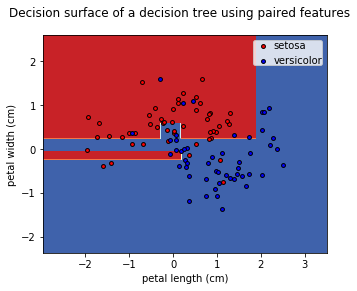

<module 'matplotlib.pyplot' from '/home/ec2-user/anaconda3/envs/tf+sklearn_p36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [192]:
feature_names= iris.feature_names[2:]
class_names = iris.target_names
draw_tree_decision_boundary(tree_clf,X,y, feature_names, class_names)


In [193]:
from sklearn.datasets import make_moons
X, y = make_moons(noise=0.45)

In [194]:
tree_clf = DecisionTreeClassifier(
    #max_depth=5
    min_samples_leaf=4
    )
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

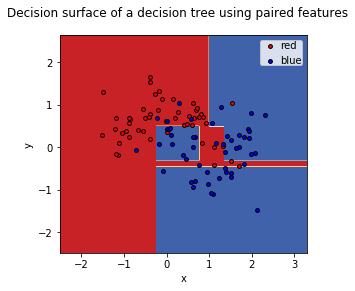

<module 'matplotlib.pyplot' from '/home/ec2-user/anaconda3/envs/tf+sklearn_p36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [195]:
draw_tree_decision_boundary(tree_clf, X, y, ['x','y'],['red','blue'])

In [196]:
def generate_data(n_points=10000, n_features=3, use_nonlinear=True, 
                    noise_std=0.1, train_test_split = 4):
    """
    Arguments:
    n_points - number of data points to generate
    n_features - a positive integer - number of features
    use_nonlinear - if True, generate non-linear data
    train_test_split - an integer - what portion of data to use for testing
    
    Return:
    X_train, Y_train, X_test, Y_test, n_train, n_features
    """
    # Linear data or non-linear data?
    if use_nonlinear:
        weights = np.array([[1.0, 0.5, 0.2],[0.5, 0.3, 0.15]], dtype=np.float32)
    else:
        weights = np.array([1.0, 0.5, 0.2], dtype=np.float32)
        
    bias = np.ones(n_points).reshape((-1,1))
    low = - np.ones((n_points,n_features), dtype=np.float32)
    high = np.ones((n_points,n_features), dtype=np.float32)
    
    X = np.random.uniform(low=low, high=high)
    noise = np.random.normal(size=(n_points, 1))
    noise_std = 0.1
    
    if use_nonlinear:
        Y = (weights[0,0] * bias + np.dot(X, weights[0, :]).reshape((-1,1)) + 
             np.dot(X*X, weights[1, :]).reshape([-1,1]) +
             noise_std * noise)
    else:
        Y = (weights[0] * bias + np.dot(X, weights[:]).reshape((-1,1)) + 
             noise_std * noise)
    
    n_test = int(n_points/train_test_split)
    n_train = n_points - n_test
    
    X_train = X[:n_train,:]
    Y_train = Y[:n_train].reshape((-1,1))

    X_test = X[n_train:,:]
    Y_test = Y[n_train:].reshape((-1,1))
    
    return X_train, Y_train, X_test, Y_test, n_train, n_features

X_train, y_train, X_test, y_test, n_train, n_features = generate_data(use_nonlinear=False)
X_train.shape, y_train.shape

((7500, 3), (7500, 1))

In [197]:
from sklearn.tree import DecisionTreeRegressor

In [198]:
tree_reg = DecisionTreeRegressor (max_depth = 2)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [178]:
def draw_tree_diagram(clf, feature_names=None, class_names=None):

    if feature_names == None:
        feature_names = ['x{}'.format(n) for n in range(1,clf.n_features_+1)]

    if class_names == None:
        class_names = ['y{}'.format(n) for n in range(1,clf.n_classes_+1)]

    from sklearn.tree import export_graphviz
    export_graphviz(
        tree_reg,
        out_file = 'tmp.dot',
        feature_names= feature_names,
        class_names = class_names,
        rounded = True,
        filled = True
        )

    !command dot -Tsvg tmp.dot -o tmp.svg

    from IPython.display import HTML
    return HTML(filename="./tmp.svg")

In [179]:
draw_tree_diagram(tree_reg)

ValueError: x and y must be the same size

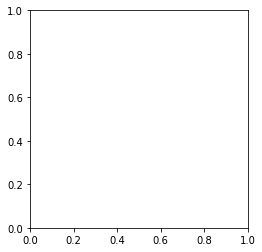

In [189]:
X = X[:,0]
y_pred = tree_reg.predict(X)

ax1 = plt.subplot2grid((1,1),(0,0), aspect='equal')

ax1.scatter(X_train, y_train)
ax1.scatter(X_train, y_pred)


In [183]:
X_train.shape

(7500, 3)